# Downside

In [3]:
import pandas as pd
import edhec_risk_kit as erk
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [4]:
hfi = erk.get_hfi_returns()

In [6]:
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


## Semideviation

In [5]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [7]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [8]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

## VaR and CVaR

Value at Risk

* Historic VaR
* Parametric VaR - Gaussian
* Modified Cronish-Fisher VaR

In [9]:
import numpy as np

In [11]:
np.percentile(hfi, 5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

The first column is "Convertible Arbitrage". This is telling us that for any given month there is a 5% chance that we are gonna lose 1.5% or worse.

In [12]:
# Another way to do it
# We lost the labeling when converting to a NumPy array
# Aggregate will call the function on each column

def var_historic(r, level=5):
    """
    VaR Historic
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be Series or DataFrame")

In [13]:
var_historic(hfi)

Convertible Arbitrage    -0.01576
CTA Global               -0.03169
Distressed Securities    -0.01966
Emerging Markets         -0.04247
Equity Market Neutral    -0.00814
Event Driven             -0.02535
Fixed Income Arbitrage   -0.00787
Global Macro             -0.01499
Long/Short Equity        -0.02598
Merger Arbitrage         -0.01047
Relative Value           -0.01174
Short Selling            -0.06783
Funds Of Funds           -0.02047
dtype: float64

Generally speaking, the way you report these numbers, because it's the Value at Risk, the idea is that there's a 5% chance you're gonna lose this amount or more. So you report these numbers as positive numbers rather than negative numbers.

In [15]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [16]:
from scipy.stats import norm

In [19]:
# For a normal distribution what is the z-score associated where 
# half of the distribution lies below that. That would be right at the mean
# which would be a z-score of 0.

# At a 5% level the z-score tells us how far this is from the mean.
z = norm.ppf(0.05)
z

-1.6448536269514729

In [21]:
# VaR at the 5% level
-(hfi.mean() + z*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [22]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

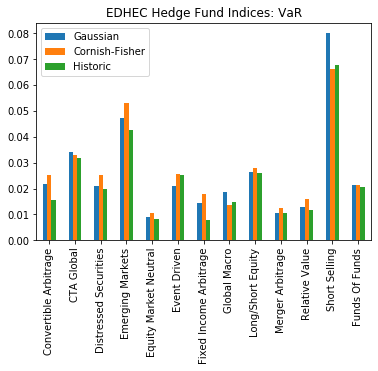

In [23]:
# Gaussian VaR is computing a z-score as if returns where a gaussian distribution
# We know kurtosis is not 3, skewness is not zero
# We should be able to adjust that z-score for the skewness and kurtosis we can compute

var_list = [erk.var_gaussian(hfi), 
            erk.var_gaussian(hfi, modified=True), erk.var_historic(hfi)]

comparison = pd.concat(var_list, axis=1)
comparison.columns = ["Gaussian", "Cornish-Fisher", "Historic"]
comparison.plot.bar(title="EDHEC Hedge Fund Indices: VaR")

## Beyond VaR aka CVaR